# CovidSFPlot.py

In [1]:
import matplotlib.pyplot as plt

# Function to plot the San Francisco Covid data
def fPlotSFCovid(pFileName):
    x = []  # dates
    y = []  # moving averages
    
    # Read the file and extract date and moving average data
    with open(pFileName, "r") as file:
        for line in file:
            date, cases, mov_avg = line.strip().split(",")
            x.append(date)
            y.append(float(mov_avg))
    
    # Customize the plot axes
    ax = plt.axes()
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    
    # Create the scatter plot
    plt.scatter(x, y, c='blue')
    
    # Show the plot
    plt.show()

# Project2.py

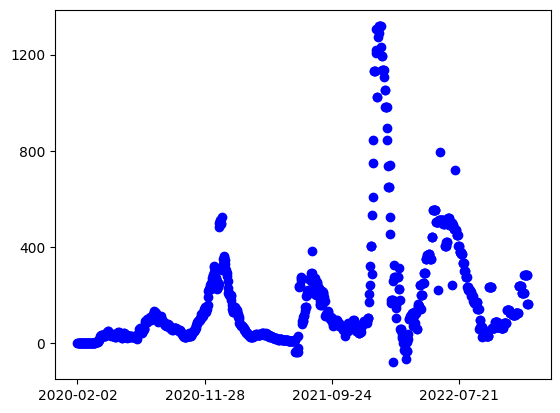

In [2]:
import os
import CovidSFPlot as plot

# Define input and output file paths and moving average window
FILE_PATH_INPUT = ["us-counties-2020.csv", "us-counties-2021.csv", "us-counties-2022.csv"]
FILE_PATH_OUTPUT = "covid-SF.csv"
WINDOW = 7

def main():
    # Delete output file if it exists
    if os.path.exists(FILE_PATH_OUTPUT):
        os.remove(FILE_PATH_OUTPUT)

    # Read and process input files
    for file in FILE_PATH_INPUT:
        sf_data = fReadInputFile(file)
        fWriteOutputFile(sf_data)
    
    # Read output file and calculate moving averages
    sf_daily_cases = fReadOutputFile(FILE_PATH_OUTPUT)
    sf_mov_avg = fCalcMovAvg(sf_daily_cases)
    fWriteMovAvgFile(sf_mov_avg)

    # Plot the data
    plot.fPlotSFCovid(FILE_PATH_OUTPUT)

# Function to read input files and extract San Francisco Covid data
def fReadInputFile(pFileName):
    data = []
    prev_cumulative_cases = 0
    with open(pFileName, "r") as file:
        for line in file:
            if "San Francisco" in line:
                columns = line.strip().split(",")
                date = columns[0]
                cumulative_cases = columns[4]
                daily_cases = int(cumulative_cases) - prev_cumulative_cases
                prev_cumulative_cases = int(cumulative_cases)
                if daily_cases > 2000:
                    daily_cases = 2000
                data.append(f"{date},{daily_cases}\n")
    return data

# Function to write data to output file
def fWriteOutputFile(pList):
    with open(FILE_PATH_OUTPUT, "a") as file:
        for item in pList:
            file.write(item)

# Function to read output file and extract daily case numbers
def fReadOutputFile(pFile):
    daily_cases = []
    with open(pFile, "r") as file:
        for line in file:
            date, cases = line.strip().split(",")
            daily_cases.append(int(cases))
    return daily_cases

# Function to calculate moving averages
def fCalcMovAvg(pList):
    lstMovAvg = []
    for i in range(len(pList)):
        if i < 6:
            lstMovAvg.append(0)
        else:
            mov_avg = sum(pList[i-6:i+1]) / WINDOW
            lstMovAvg.append(mov_avg)
    return lstMovAvg

# Function to write moving averages to output file
def fWriteMovAvgFile(pListMovAvg):
    modified_content = ""
    with open(FILE_PATH_OUTPUT, "r") as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
            modified_line = line.strip() + f",{pListMovAvg[i]}\n"
            modified_content += modified_line

    # Write the modified content with moving averages back to the output file
    with open(FILE_PATH_OUTPUT, "w") as file:
        file.write(modified_content)

# Run the main function when this script is executed
if __name__ == "__main__":
    main()